In [22]:
# !pip install logging
# !pip install farm-haystack
# !pip install sentence-transformers
# !pip install seqeval

In [23]:
# from google.colab import drive
# drive.mount('/content/drive')

In [24]:
import logging

logging.basicConfig(format="%(levelname)s - %(name)s -  %(message)s", level=logging.WARNING)
logging.getLogger("haystack").setLevel(logging.INFO)

from haystack.nodes import DensePassageRetriever
#from haystack.utils import fetch_archive_from_http
from haystack.document_stores import InMemoryDocumentStore

In [1]:
doc_dir = "/content/drive/MyDrive/AIR Project"

#train_filename = "GermanQuAD_train_converted_first_entry.json"
train_filename = "GermanQuAD_train_converted.json"
#train_filename = "GermanDPR_train_first_entry.json"
#train_filename = "GermanDPR_train.json"

dev_filename = "GermanQuAD_train_converted.json"
#dev_filename = "GermanDPR_train_converted.json"

query_model = "facebook/dpr-question_encoder-single-nq-base"
passage_model = "facebook/dpr-ctx_encoder-single-nq-base"

save_dir = "/content/drive/MyDrive/AIR Project/GermanQuAD train eq test"

In [26]:
# Initialize DPR model

retriever = DensePassageRetriever(
    document_store=InMemoryDocumentStore(),
    query_embedding_model=query_model,
    passage_embedding_model=passage_model,
    max_seq_len_query=64,
    max_seq_len_passage=256,
)

# Start training our model and save it when it is finished

retriever.train(
    data_dir=doc_dir,
    train_filename=train_filename,
    dev_filename=dev_filename,
    test_filename=dev_filename,
    n_epochs=1,
    batch_size=16,
    grad_acc_steps=8,
    save_dir=save_dir,
    evaluate_every=3000,
    embed_title=True,
    num_positives=1,
    num_hard_negatives=1,
)

INFO:haystack.modeling.utils:Using devices: CUDA:0 - Number of GPUs: 1
INFO:haystack.modeling.utils:Using devices: CUDA:0 - Number of GPUs: 1
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
INFO:haystack.modeling.model.language_model:Auto-detected model language: english
INFO:haystack.modeling.model.language_model:Auto-detected model language: english
INFO:haystack.modeling.data_handler.data_silo:
Loading data into the data silo ... 
              ______
               |o  |   !
   __          |:`_|---'-.
  |__|______.-/ _ 

**Output train only first entry of GermanQuAD (Basemodel):**
---------------------------------------------------

\\|//       \\|//      \\|//       \\|//     \\|//
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
***************************************************
***** EVALUATION | TEST SET | AFTER 1 BATCHES *****
***************************************************
\\|//       \\|//      \\|//       \\|//     \\|//
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

INFO:haystack.modeling.evaluation.eval:
 _________ text_similarity _________
INFO:haystack.modeling.evaluation.eval:loss: 0.16717383376375083
INFO:haystack.modeling.evaluation.eval:task_name: text_similarity
INFO:haystack.modeling.evaluation.eval:acc: 0.9715754202635166
INFO:haystack.modeling.evaluation.eval:f1: 0.5458257713248639
INFO:haystack.modeling.evaluation.eval:acc_and_f1: 0.7587005957941902
INFO:haystack.modeling.evaluation.eval:average_rank: 1.7599818511796734
INFO:haystack.modeling.evaluation.eval:report:
                precision    recall  f1-score   support

hard_negative     0.9853    0.9853    0.9853     68228
     positive     0.5458    0.5458    0.5458      2204

     accuracy                         0.9716     70432
    macro avg     0.7656    0.7656    0.7656     70432
 weighted avg     0.9716    0.9716    0.9716     70432

**Output train only first entry of GermanDPR (Basemodel):**
---------------------------------------------------

\\|//       \\|//      \\|//       \\|//     \\|//
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
***************************************************
***** EVALUATION | TEST SET | AFTER 1 BATCHES *****
***************************************************
\\|//       \\|//      \\|//       \\|//     \\|//
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

INFO:haystack.modeling.evaluation.eval:
 _________ text_similarity _________
INFO:haystack.modeling.evaluation.eval:loss: 0.21136056818477256
INFO:haystack.modeling.evaluation.eval:task_name: text_similarity
INFO:haystack.modeling.evaluation.eval:acc: 0.9636252670125114
INFO:haystack.modeling.evaluation.eval:f1: 0.41853658536585364
INFO:haystack.modeling.evaluation.eval:acc_and_f1: 0.6910809261891825
INFO:haystack.modeling.evaluation.eval:average_rank: 3.08
INFO:haystack.modeling.evaluation.eval:report:
                precision    recall  f1-score   support

hard_negative     0.9812    0.9812    0.9812     31745
     positive     0.4185    0.4185    0.4185      1025

     accuracy                         0.9636     32770
    macro avg     0.6999    0.6999    0.6999     32770
 weighted avg     0.9636    0.9636    0.9636     32770

**Ouput after finetuning with GermanQuAD:**
---------------------------------------------------

\\|//       \\|//      \\|//       \\|//     \\|//
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
***************************************************
***** EVALUATION | TEST SET | AFTER 2880 BATCHES *****
***************************************************
\\|//       \\|//      \\|//       \\|//     \\|//
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

INFO:haystack.modeling.evaluation.eval:
 _________ text_similarity _________
INFO:haystack.modeling.evaluation.eval:loss: 0.21550037061268748
INFO:haystack.modeling.evaluation.eval:task_name: text_similarity
INFO:haystack.modeling.evaluation.eval:acc: 0.9765199637023594
INFO:haystack.modeling.evaluation.eval:f1: 0.9060798548094374
INFO:haystack.modeling.evaluation.eval:acc_and_f1: 0.9412999092558985
INFO:haystack.modeling.evaluation.eval:average_rank: 0.13520871143375682
INFO:haystack.modeling.evaluation.eval:report:
                precision    recall  f1-score   support

hard_negative     0.9866    0.9866    0.9866     15428
     positive     0.9061    0.9061    0.9061      2204

     accuracy                         0.9765     17632
    macro avg     0.9463    0.9463    0.9463     17632
 weighted avg     0.9765    0.9765    0.9765     17632

**Output after finetuning with GermanDPR**
---------------------------------------------------

\\|//       \\|//      \\|//       \\|//     \\|//
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
***************************************************
***** EVALUATION | TEST SET | AFTER 2319 BATCHES *****
***************************************************
\\|//       \\|//      \\|//       \\|//     \\|//
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

INFO:haystack.modeling.evaluation.eval:
 _________ text_similarity _________
INFO:haystack.modeling.evaluation.eval:loss: 0.3636443769713743
INFO:haystack.modeling.evaluation.eval:task_name: text_similarity
INFO:haystack.modeling.evaluation.eval:acc: 0.9433731999023676
INFO:haystack.modeling.evaluation.eval:f1: 0.7736585365853659
INFO:haystack.modeling.evaluation.eval:acc_and_f1: 0.8585158682438667
INFO:haystack.modeling.evaluation.eval:average_rank: 0.36
INFO:haystack.modeling.evaluation.eval:report:
                precision    recall  f1-score   support

hard_negative     0.9676    0.9676    0.9676      7169
     positive     0.7737    0.7737    0.7737      1025

     accuracy                         0.9434      8194
    macro avg     0.8706    0.8706    0.8706      8194
 weighted avg     0.9434    0.9434    0.9434      8194

**Output after both training and testing with GermanQuAD_train:**
--------------------------------------

\\|//       \\|//      \\|//       \\|//     \\|//
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
***************************************************
***** EVALUATION | TEST SET | AFTER 720 BATCHES *****
***************************************************
\\|//       \\|//      \\|//       \\|//     \\|//
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

INFO:haystack.modeling.evaluation.eval:
 _________ text_similarity _________
INFO:haystack.modeling.evaluation.eval:loss: 0.04904071882886366
INFO:haystack.modeling.evaluation.eval:task_name: text_similarity
INFO:haystack.modeling.evaluation.eval:acc: 0.9926571149462716
INFO:haystack.modeling.evaluation.eval:f1: 0.8825316895294322
INFO:haystack.modeling.evaluation.eval:acc_and_f1: 0.937594402237852
INFO:haystack.modeling.evaluation.eval:average_rank: 0.3722000347282514
INFO:haystack.modeling.evaluation.eval:report:
                precision    recall  f1-score   support

hard_negative     0.9962    0.9962    0.9962    357002
     positive     0.8825    0.8825    0.8825     11518

     accuracy                         0.9927    368520
    macro avg     0.9394    0.9394    0.9394    368520
 weighted avg     0.9927    0.9927    0.9927    368520

INFO:haystack.modeling.model.biadaptive_model:prediction_head saving

**Output after both training and testing with GermanDPR_train**:
--------------------------------

\\|//       \\|//      \\|//       \\|//     \\|//
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
***************************************************
***** EVALUATION | TEST SET | AFTER 580 BATCHES *****
***************************************************
\\|//       \\|//      \\|//       \\|//     \\|//
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

INFO:haystack.modeling.evaluation.eval:
 _________ text_similarity _________
INFO:haystack.modeling.evaluation.eval:loss: 0.0869749029682048
INFO:haystack.modeling.evaluation.eval:task_name: text_similarity
INFO:haystack.modeling.evaluation.eval:acc: 0.9857157302234656
INFO:haystack.modeling.evaluation.eval:f1: 0.7715363881401616
INFO:haystack.modeling.evaluation.eval:acc_and_f1: 0.8786260591818136
INFO:haystack.modeling.evaluation.eval:average_rank: 0.8175741239892184
INFO:haystack.modeling.evaluation.eval:report:
                precision    recall  f1-score   support

hard_negative     0.9926    0.9926    0.9926    287415
     positive     0.7715    0.7715    0.7715      9275

     accuracy                         0.9857    296690
    macro avg     0.8821    0.8821    0.8821    296690
 weighted avg     0.9857    0.9857    0.9857    296690

**F1 scores**
----------

**GermaQuAD**

Basemodel: 0.5458257713248639

Finetuned: 0.9060798548094374

Testing with train: 0.8825316895294322

**GermanDPR**

Basemodel: 0.41853658536585364

Finetuned: 0.7736585365853659

Testing with train: 0.7715363881401616

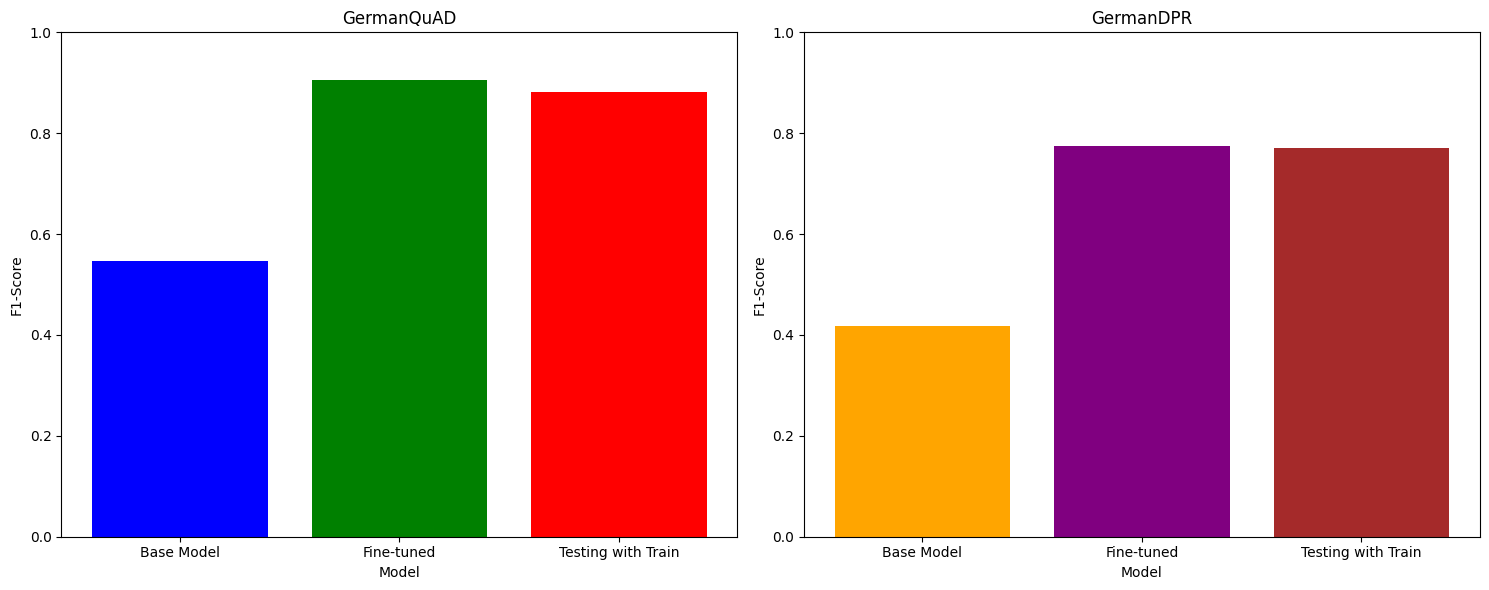

In [6]:
import matplotlib.pyplot as plt

# GermanQuAD
models = ['Base Model', 'Fine-tuned', 'Testing with Train']
values = [0.5458257713248639, 0.9060798548094374, 0.8825316895294322]

# GermanDPR
additional_values = [0.41853658536585364, 0.7736585365853659, 0.7715363881401616]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# First plot
axes[0].bar(models, values, color=['blue', 'green', 'red'])
axes[0].set_title('GermanQuAD')
axes[0].set_xlabel('Model')
axes[0].set_ylabel('F1-Score')
axes[0].set_ylim(0, 1)

# Second plot
axes[1].bar(models, additional_values, color=['orange', 'purple', 'brown'])
axes[1].set_title('GermanDPR')
axes[1].set_xlabel('Model')
axes[1].set_ylabel('F1-Score')
axes[1].set_ylim(0, 1)

plt.tight_layout()
plt.show()